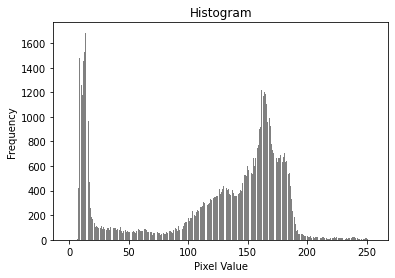

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def histogram(image):
    # Calculate histogram
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    # Plot histogram
    plt.figure()
    plt.bar(range(256), histogram, color='gray')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()


# Read image using OpenCV
image = cv2.imread('cameraman.png', 0)  # Read as grayscale

# Call histogram function
histogram(image)

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate histogram manually
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]

    # Perform histogram equalization
    equalized_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            equalized_image[i, j] = cdf_normalized[pixel_value]

    # Display images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(equalized_image, cmap='gray')
    axes[1].set_title('Equalized Image')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()


# Load and display image
image = cv2.imread('his_eq_test.jpeg', 0)  # Read as grayscale

if image is not None:
    # Call histogram equalization function
    histogram_equalization(image)
else:
    print("Failed to load the image.")

Failed to load the image.


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate histogram manually
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1

    # Calculate cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]

    # Perform histogram equalization
    equalized_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            equalized_image[i, j] = cdf_normalized[pixel_value]

    # Calculate histogram of equalized image
    equalized_histogram = np.zeros(256, dtype=int)

    for i in range(height):
        for j in range(width):
            pixel_value = equalized_image[i, j]
            equalized_histogram[pixel_value] += 1

    # Display original and equalized histograms
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    axes[0, 1].bar(range(256), histogram, color='gray')
    axes[0, 1].set_title('Original Histogram')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')
    axes[1, 0].imshow(equalized_image, cmap='gray')
    axes[1, 0].set_title('Equalized Image')
    axes[1, 0].axis('off')
    axes[1, 1].bar(range(256), equalized_histogram, color='gray')
    axes[1, 1].set_title('Equalized Histogram')
    axes[1, 1].set_xlabel('Pixel Value')
    axes[1, 1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# Load and display image
image = cv2.imread('his_eq_test.jpeg', 0)  # Read as grayscale

if image is not None:
    # Call histogram equalization function
    histogram_equalization(image)
else:
    print("Failed to load the image.")

Failed to load the image.


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def contrast_stretching(image, min_new, max_new):
    # Perform contrast stretching
    min_old = np.min(image)
    max_old = np.max(image)

    stretched_image = np.zeros_like(image, dtype=np.uint8)
    height, width = image.shape

    original_pixels = []
    stretched_pixels = []

    for i in range(height):
        for j in range(width):
            pixel_value = image[i, j]
            stretched_value = int((pixel_value - min_old) / (max_old - min_old) * (max_new - min_new) + min_new)

            original_pixels.append(pixel_value)
            stretched_pixels.append(stretched_value)

            stretched_image[i, j] = stretched_value

    # Display images
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')
    axes[0, 1].hist(original_pixels, bins=256, color='gray')
    axes[0, 1].set_title('Original Histogram')
    axes[0, 1].set_xlabel('Pixel Value')
    axes[0, 1].set_ylabel('Frequency')
    axes[1, 0].imshow(stretched_image, cmap='gray')
    axes[1, 0].set_title('Contrast Stretched Image')
    axes[1, 0].axis('off')
    axes[1, 1].hist(stretched_pixels, bins=256, color='gray')
    axes[1, 1].set_title('Stretched Histogram')
    axes[1, 1].set_xlabel('Pixel Value')
    axes[1, 1].set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()


# Load and display image
image = cv2.imread('construct.jpg', 0)  # Read as grayscale

if image is not None:
    # Define stretch parameters (min_new and max_new)
    min_new = 0
    max_new = 255

    # Call contrast stretching function
    contrast_stretching(image, min_new, max_new)
else:
    print("Failed to load the image.")

Failed to load the image.


In [6]:
import numpy as np

def construct_stretching(image, min_intensity, max_intensity):
  """Stretches the intensity range of an image to the given range.

  Args:
    image: A 2D grayscale image.
    min_intensity: The minimum intensity value of the output image.
    max_intensity: The maximum intensity value of the output image.

  Returns:
    A numpy array containing the stretched image.
  """

  # Calculate the minimum and maximum intensity values of the input image.
  min_intensity_input = np.min(image)
  max_intensity_input = np.max(image)

  # Calculate the scaling factor.
  scaling_factor = (max_intensity - min_intensity) / (max_intensity_input - min_intensity_input)

  # Stretch the image.
  stretched_image = np.zeros_like(image)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      stretched_image[i, j] = min_intensity + (image[i, j] - min_intensity_input) * scaling_factor

  # Clip the image to the desired intensity range.
  stretched_image = np.clip(stretched_image, min_intensity, max_intensity)

  # Return the stretched image.
  return stretched_image


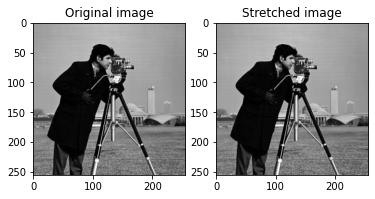

In [8]:
import numpy as np
from matplotlib import pyplot as plt

# Load the image.
image = plt.imread("cameraman.png")

# Stretch the image to the range [0, 255].
stretched_image = construct_stretching(image, 0, 1)

# Display the original and stretched images.
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original image")

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap="gray")
plt.title("Stretched image")

plt.show()